In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Zomato Restaurant names and Metadata.csv to Zomato Restaurant names and Metadata (2).csv


In [ ]:
data = pd.read_csv("Zomato Restaurant names and Metadata.csv")
data.head()


,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
data['Cost'] = data['Cost'].astype(str).str.replace(',', '').str.strip()
data['Cost'] = pd.to_numeric(data['Cost'], errors='coerce')
print("Missing values per column:")
print(data.isnull().sum())
data = data.dropna(subset=['Cost', 'Cuisines'])


Missing values per column:
Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64


/tmp/ipython-input-31-4266716846.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_cuisines, y='Cuisine', x='Count', palette='viridis')


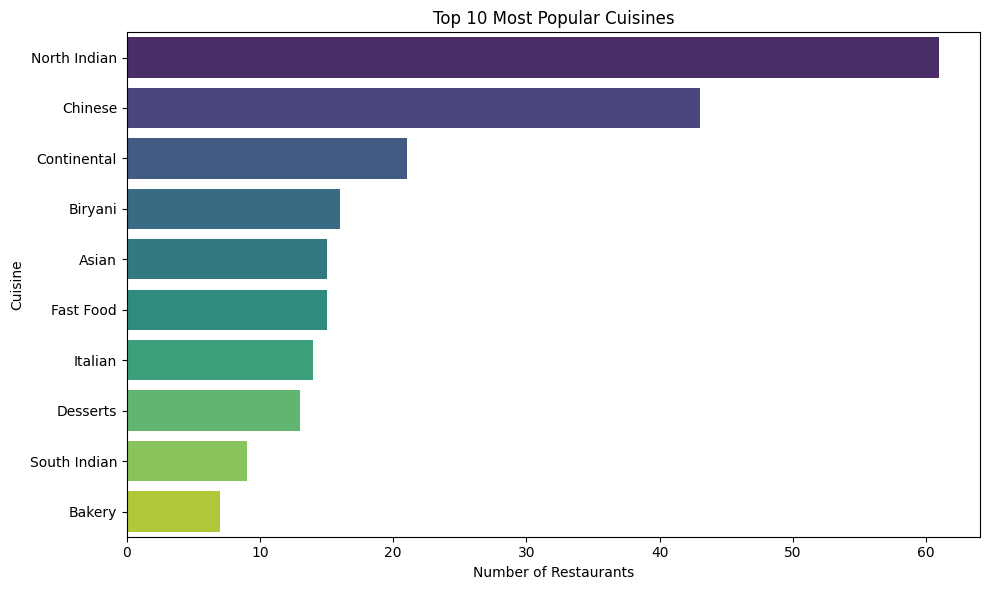

In [ ]:
from collections import Counter
cuisine_list = []
for x in data['Cuisines'].dropna():
    for cuisine in str(x).split(','):
        cuisine_list.append(cuisine.strip())

cuisine_counter = Counter(cuisine_list)
top10_cuisines = pd.DataFrame(cuisine_counter.most_common(10), columns=['Cuisine', 'Count'])

plt.figure(figsize=(10,6))
sns.barplot(data=top10_cuisines, y='Cuisine', x='Count', palette='viridis')
plt.title('Top 10 Most Popular Cuisines')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.tight_layout()
plt.show()


In [ ]:
cuisine_dummies = data['Cuisines'].str.get_dummies(sep=', ')
features = pd.concat([data[['Cost']], cuisine_dummies], axis=1)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = kmeans.fit_predict(features_scaled)
data['Cluster'] = clusters

print(data[['Name', 'Cost', 'Cuisines', 'Cluster']].head())


                             Name  Cost  \
0                 Beyond Flavours   800   
1                        Paradise   800   
2                        Flechazo  1300   
3  Shah Ghouse Hotel & Restaurant   800   
4      Over The Moon Brew Company  1200   

                                            Cuisines  Cluster  
0  Chinese, Continental, Kebab, European, South I...        0  
1                     Biryani, North Indian, Chinese        0  
2       Asian, Mediterranean, North Indian, Desserts        4  
3  Biryani, North Indian, Chinese, Seafood, Bever...        0  
4  Asian, Continental, North Indian, Chinese, Med...        4  


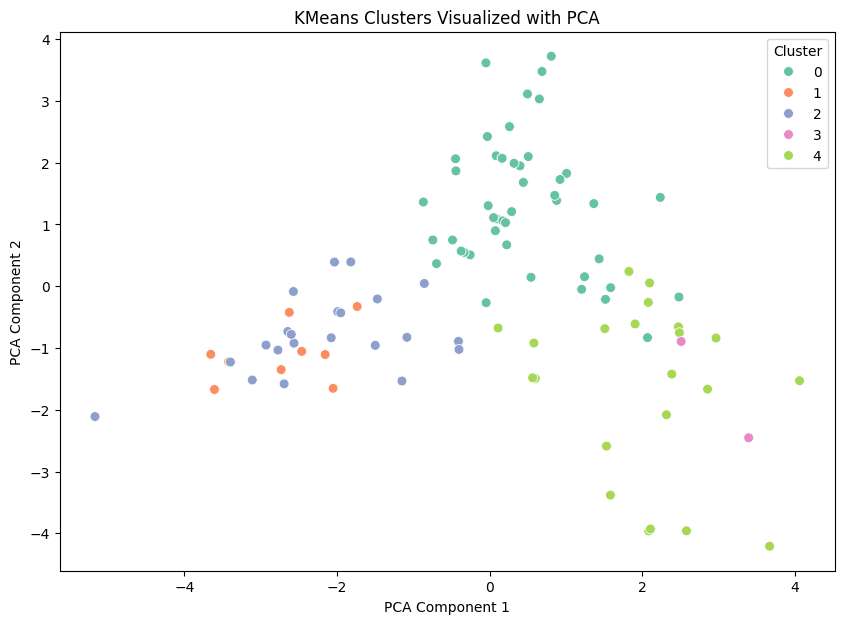

In [34]:
pca = PCA(n_components=2)
components = pca.fit_transform(features_scaled)
plt.figure(figsize=(10, 7))
sns.scatterplot(x=components[:,0], y=components[:,1], hue=data['Cluster'], palette='Set2', s=50)
plt.title('KMeans Clusters Visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()
